Increasing resolution: Increase the resolution of image
Deskewing: Deskew the image. It also makes it easier to do more processing.
Blurring: It is useful for removing noise.
Convert to Black and White: Convert the image into black and white after deskewing and resizing. It will produce consistent character size and thickness.
Remove Noise: Remove noise from black and white image. Perform operations like morphological transformation, contours etc. to remove the noise.
Train Tesseract on the Font

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mpimg

import warnings 
warnings.filterwarnings('ignore')

In [4]:
img1 = mpimg.imread('cat.jpg')
print(img1)

[[[ 21  59  48]
  [ 21  59  48]
  [ 22  58  48]
  ...
  [ 41  81  10]
  [ 45  85  15]
  [ 49  88  23]]

 [[ 21  59  48]
  [ 21  59  48]
  [ 22  58  48]
  ...
  [ 48  88  17]
  [ 52  92  22]
  [ 54  95  27]]

 [[ 21  59  48]
  [ 21  59  48]
  [ 22  58  48]
  ...
  [ 53  95  23]
  [ 57  99  27]
  [ 60 101  31]]

 ...

 [[ 28  44   5]
  [ 29  45   6]
  [ 29  44   5]
  ...
  [185 176 159]
  [180 171 154]
  [194 185 168]]

 [[ 29  47   9]
  [ 37  53  16]
  [ 39  53  17]
  ...
  [199 190 173]
  [191 182 165]
  [190 181 164]]

 [[ 37  55  17]
  [ 44  61  25]
  [ 47  63  27]
  ...
  [215 206 189]
  [204 195 178]
  [188 179 162]]]


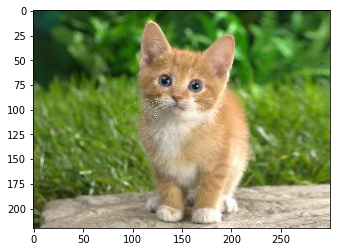

In [5]:
imgplot = plt.imshow(img1)

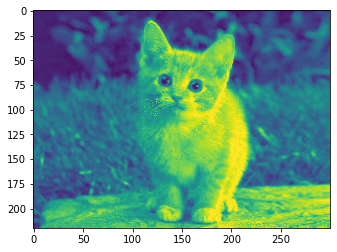

In [6]:
#Applying pseudocolor schemes to image plots
lum_img1 = img1[:, :, 0]
plt.imshow(lum_img1)

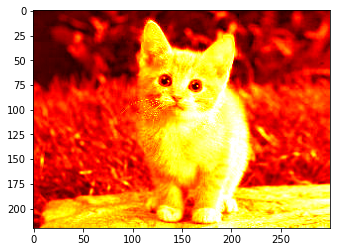

In [8]:
plt.imshow(lum_img1, cmap="hot")

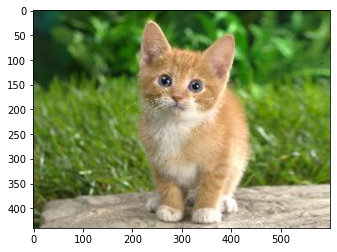

In [18]:
#Geometric Transformation of Images in Opencv
#Scaling
import numpy as np
import cv2 as cv
img = cv.imread('cat.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
# height, width = img.shape[:2]
# res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
plt.imshow(res[:, :, ::-1])


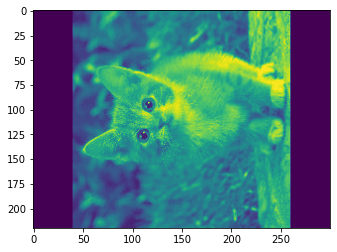

In [29]:
#Rotation at 90 degree angle
img = cv.imread('cat.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

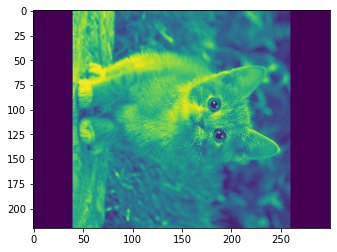

In [35]:
#Rotation at 90 degree angle
img = cv.imread('cat.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst[:,::-1])

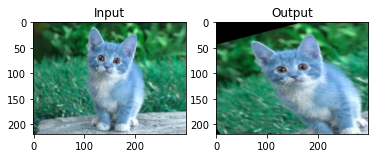

In [36]:
#Affine Transformation
img = cv.imread('cat.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

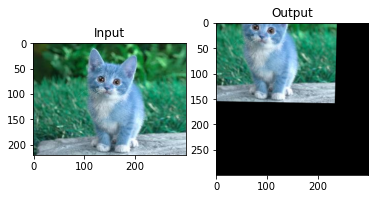

In [37]:
#Perspective Transformation
img = cv.imread('cat.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Thresholding in OpenCV
For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image.

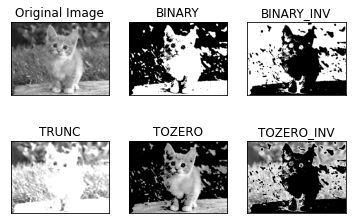

In [38]:
img = cv.imread('cat.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

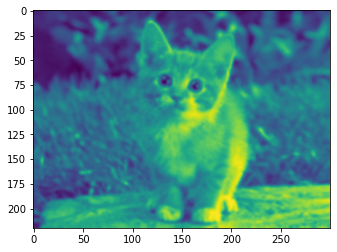

In [42]:
#Gaussian Blurring
blur = cv.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

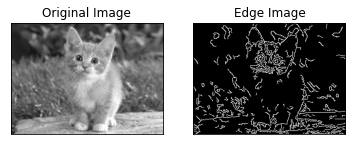

In [43]:
img = cv.imread('cat.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()